### Problem Statement:

#### Refer Ad Click Prediction Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using random forest. Analyse the performance of model with suitable evaluation measures and try to enhance the performance.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv('advertising.csv')
data.head()   

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Data Description

`Daily Time Spent on Site`: Consumer time on site in minutes 

`Age`: Customer age in years 

`Area Income`: Avg. Income of geographical area of consumer 

`Daily Internet Usage`: Avg. minutes a day consumer is on the internet 

`Ad Topic Line`: Headline of the advertisement 

`City`: City of consumer 

`Male`: Whether or not consumer was male 

`Country`: Country of consumer 

`Timestamp`: Time at which consumer clicked on Ad or closed window 

`Clicked on Ad`: 0 or 1 indicated clicking on Ad

In [3]:
print(data.shape)
print('\n')
print(data.describe())
print('\n')
print(data.info())

(1000, 10)


       Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.7

#### Checking Missing Values

In [4]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

No Missing Values

#### Checking Unique values for each column

In [7]:
for col in data:
    print(f'Number of unique values of {col}:',data[col].nunique())

Number of unique values of Daily Time Spent on Site: 900
Number of unique values of Age: 43
Number of unique values of Area Income: 1000
Number of unique values of Daily Internet Usage: 966
Number of unique values of Ad Topic Line: 1000
Number of unique values of City: 969
Number of unique values of Male: 2
Number of unique values of Country: 237
Number of unique values of Timestamp: 1000
Number of unique values of Clicked on Ad: 2


High Cardinality in city , country,etc.

### Exploratory Data Analysis

#### Countplot of 'Clicked on ad' column as target variable

0    500
1    500
Name: Clicked on Ad, dtype: int64


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

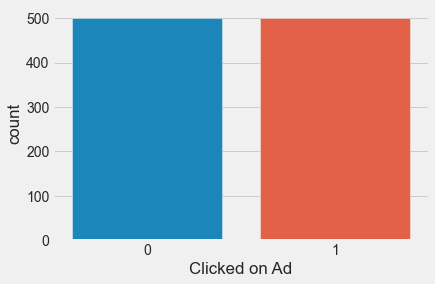

In [10]:
print(data['Clicked on Ad'].value_counts())
sns.countplot(x='Clicked on Ad',data = data)

Target Variable is balanced

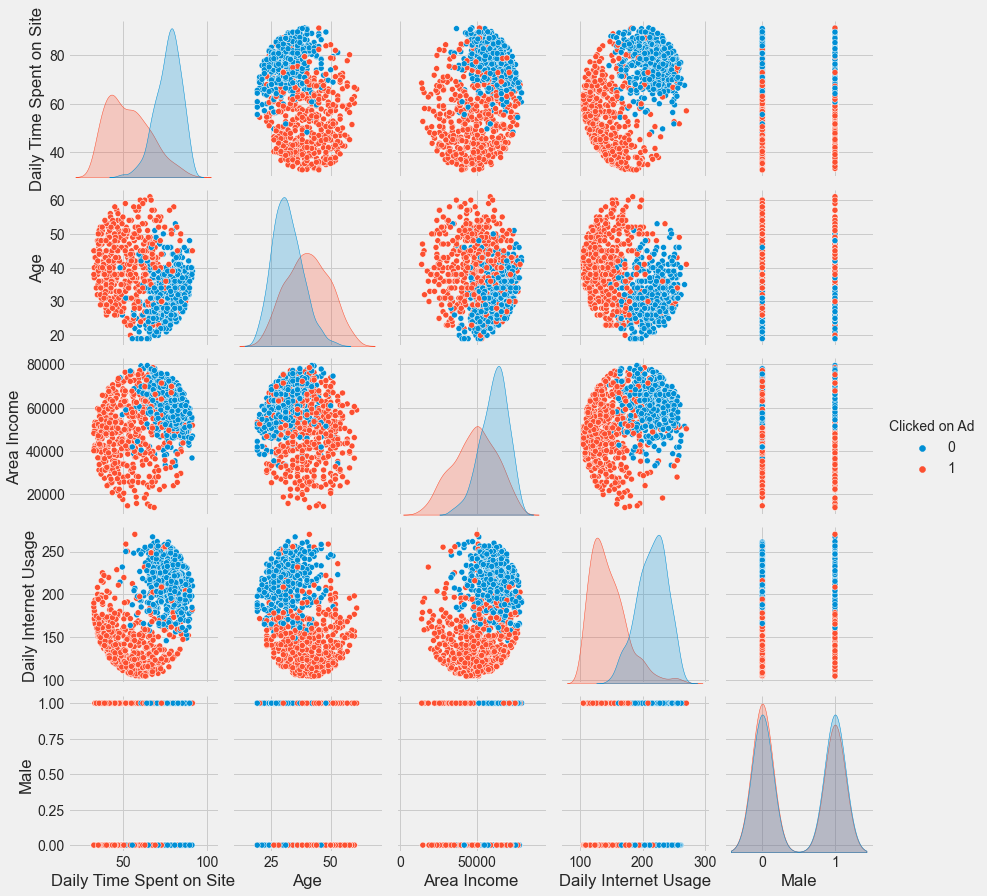

In [11]:
sns.pairplot(data,hue = 'Clicked on Ad')

Multiple pairwise bivariate distributions

#### Correlation Heatmap of Data

                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.786539  
Male                                  0.028012  1.000000      -0.038027  
Clicked on Ad   

<AxesSubplot:>

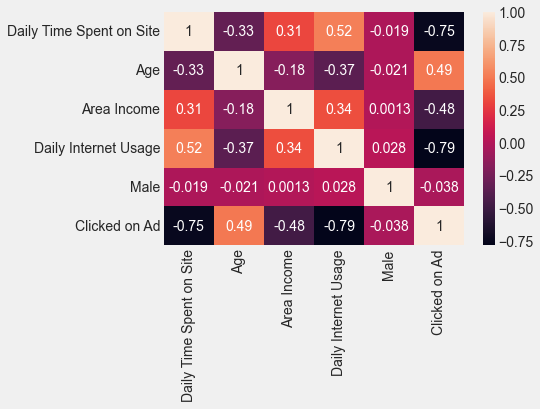

In [12]:
print(data.corr())
sns.heatmap(data.corr(),annot = True)

#### Bar graph of Male vs Click on Ad

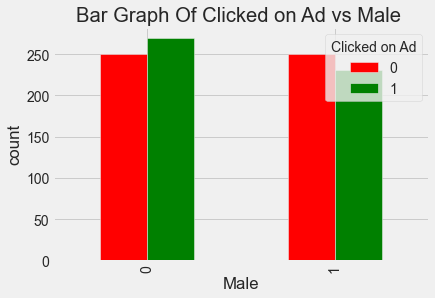

In [13]:
pd.crosstab(data.Male,data['Clicked on Ad']).plot(kind='bar',color=('red','green'))
plt.title('Bar Graph Of Clicked on Ad vs Male ')
plt.xlabel('Male')
plt.ylabel('count')
plt.show()

From Above graph we can say that count of female users who click on ad are more than male users.  

### Count plot of Age

<AxesSubplot:xlabel='Age', ylabel='count'>

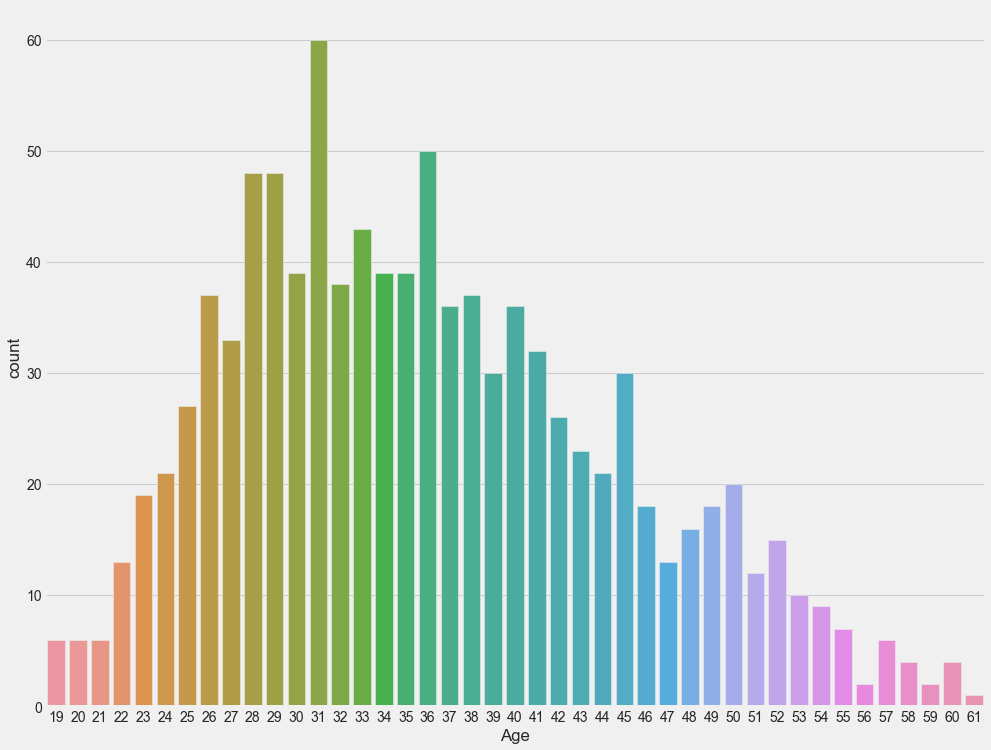

In [14]:
fig,ax = plt.subplots(figsize=(15,12))
sns.countplot(x ='Age', data = data,ax=ax)

The Plot clearly shows the majority of users are in the age range 25-40

### Bar Plot of Age vs Clicked on Ad

<AxesSubplot:xlabel='Age', ylabel='count'>

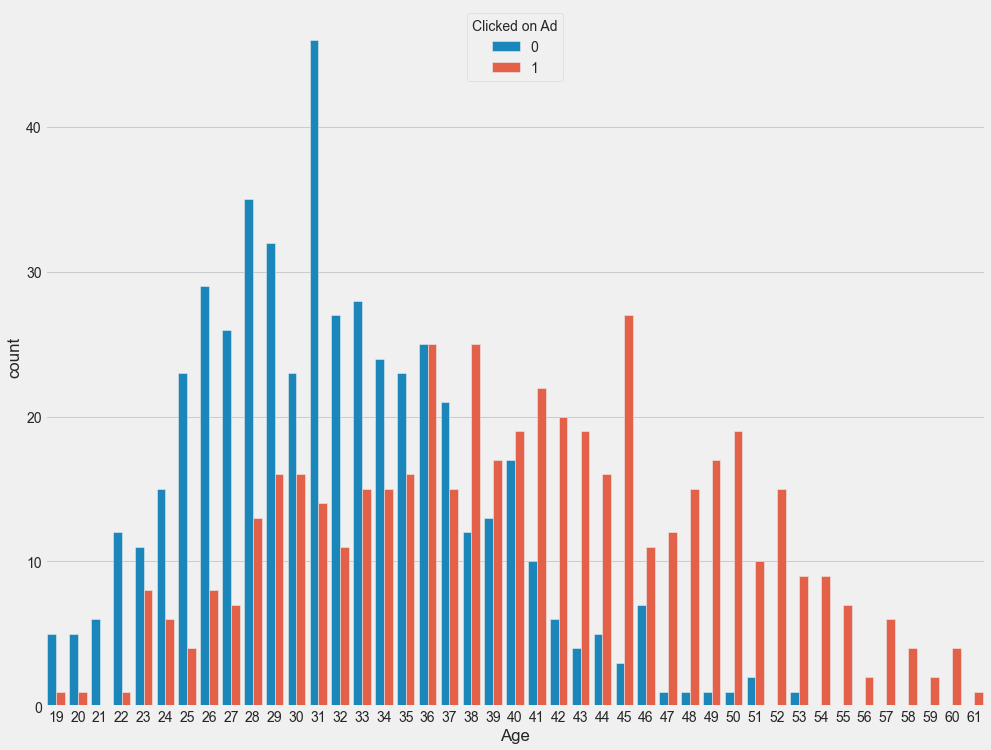

In [15]:
fig, ax = plt.subplots(figsize=(15,12))
sns.countplot(x ='Age',hue="Clicked on Ad", data = data,ax=ax)

User Between the age group 19-35 doesn't seem to be clicked on Ad and Use rbetween the age group 35-61 mostly clicked on Ad

### Model Building 

#### Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data.drop(['Clicked on Ad','Country','Timestamp','City','Ad Topic Line'],axis = 1)
Y = data['Clicked on Ad']

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [19]:
print('Number of Data points in train data:',X_train.shape)
print('Number of Data points in test data:',Y_test.shape)

Number of Data points in train data: (700, 5)
Number of Data points in test data: (300,)


### Traning Random Forest Model 

In [20]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=5)
model

RandomForestClassifier(max_depth=5)

In [21]:
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5)

In [22]:
estimator = model.estimators_[50]
estimator

DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1697291836)

In [23]:
y_pred  = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], d

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [25]:
print('Accuracy:',accuracy_score(y_pred,Y_test))
print('Classification Report : ', classification_report(y_pred,Y_test))
print('Confusion Matrix :\n ',confusion_matrix(Y_test,y_pred))

Accuracy: 0.9466666666666667
Classification Report :                precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       0.93      0.97      0.95       148

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

Confusion Matrix :
  [[141   5]
 [ 11 143]]


So from Above confusion matrix and classification report we can say that our model give good result on testing datasets with accuracy of 95%.

So random forest classifier is suitable for our datasets.

### Decision Tree

In [27]:
from sklearn.tree import plot_tree

In [28]:
tree = model.estimators_[0]
tree

DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=307622794)

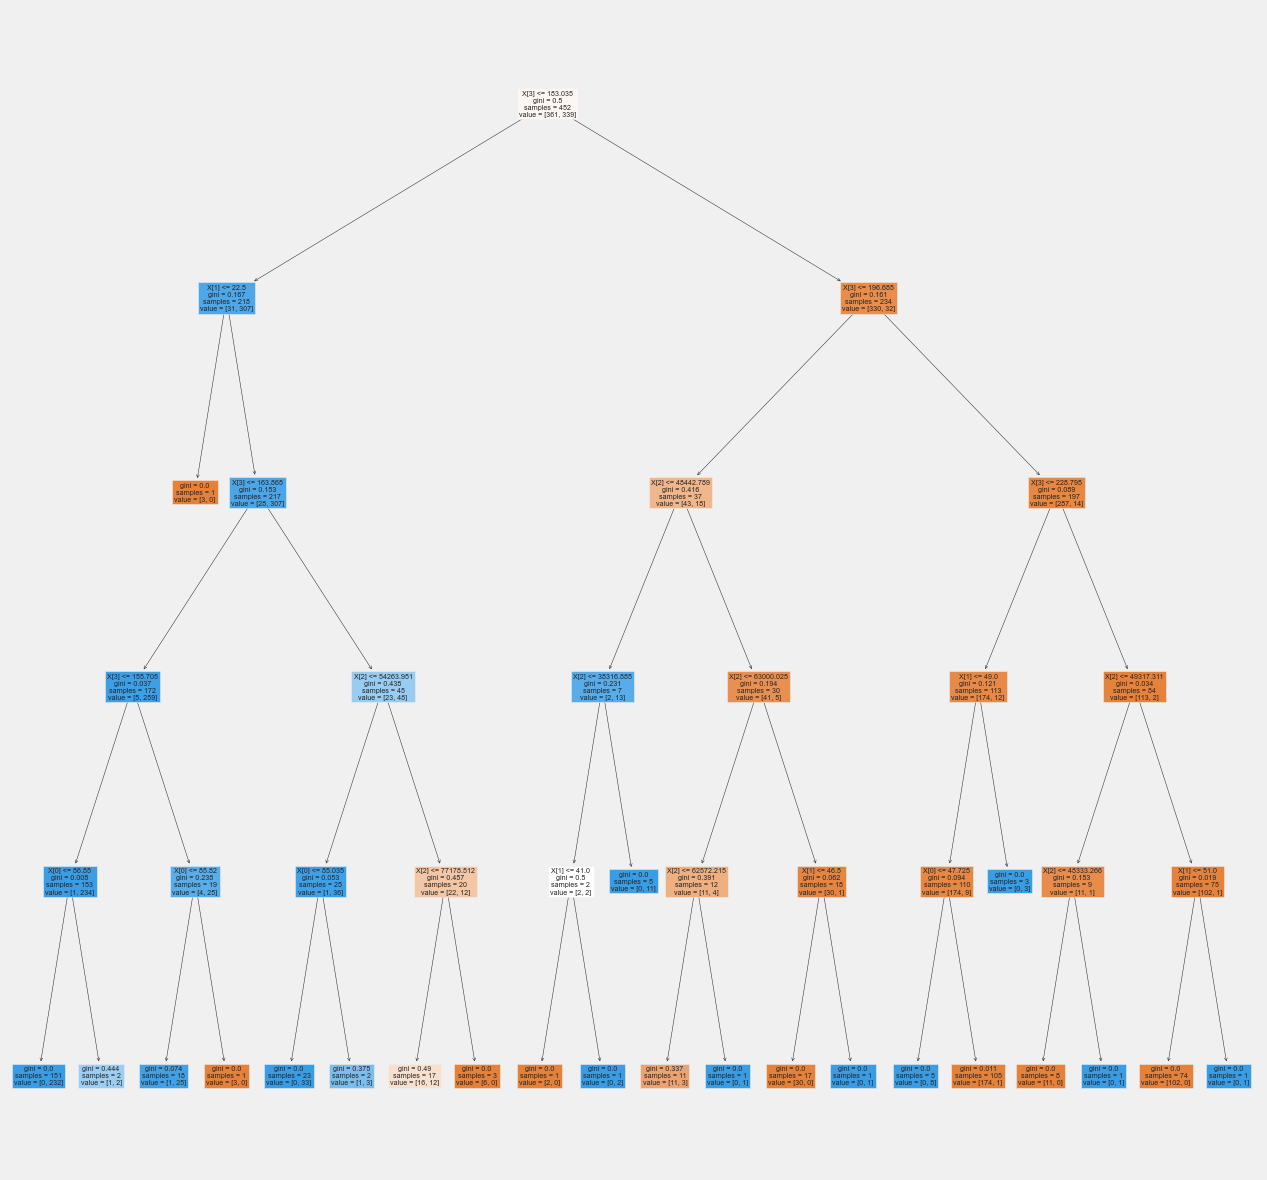

In [29]:
plt.figure(figsize = (20,20))
plot_tree(tree, filled = True)
plt.show()